Sample Mean Glucose: 116.64
Sample Highest Glucose: 183

Population Mean Glucose: 120.89453125
Population Highest Glucose: 199


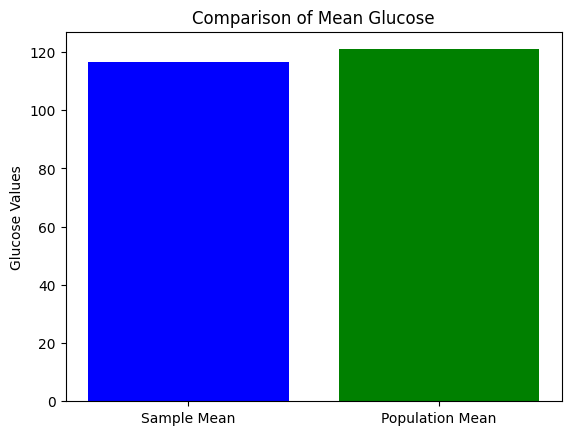

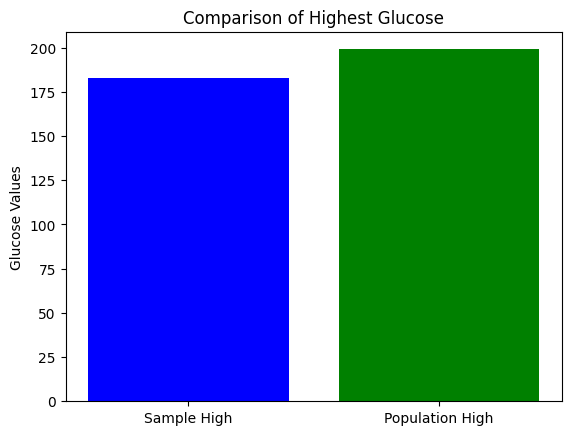

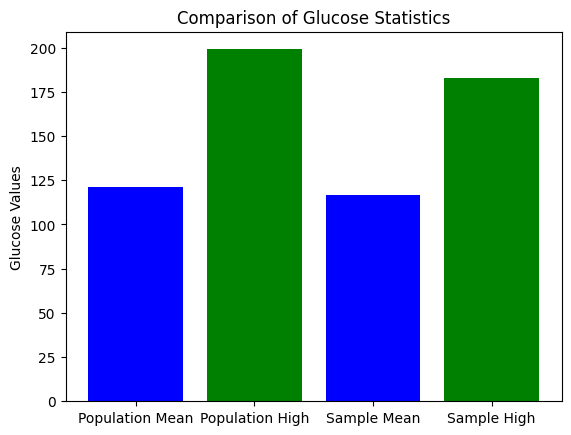

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('diabetes.csv')

# Set seed for reproducibility
np.random.seed(42)

# Part a) Random sample of 25 observations
sample = data.sample(n=25)

# Calculate mean and highest Glucose values for sample and population
sampl_mean_glucose = sample['Glucose'].mean()
sampl_high_glucose = sample['Glucose'].max()
population_mean_glucose = data['Glucose'].mean()
population_high_glucose = data['Glucose'].max()

print("Sample Mean Glucose:", sampl_mean_glucose)
print("Sample Highest Glucose:", sampl_high_glucose)
print("\nPopulation Mean Glucose:", population_mean_glucose)
print("Population Highest Glucose:", population_high_glucose)

name_label = ['Sample Mean', 'Population Mean']
values = [ sampl_mean_glucose, population_mean_glucose]
plt.bar(name_label, values, color=['blue', 'green'])
plt.title('Comparison of Mean Glucose')
plt.ylabel('Glucose Values')
plt.show()

name_label = ['Sample High', 'Population High']
values = [ sampl_high_glucose, population_high_glucose]
plt.bar(name_label, values, color=['blue', 'green'])
plt.title('Comparison of Highest Glucose')
plt.ylabel('Glucose Values')
plt.show()

name_label = ['Population Mean', 'Population High', 'Sample Mean', 'Sample High']
values = [population_mean_glucose, population_high_glucose, sampl_mean_glucose, sampl_high_glucose]
plt.bar(name_label, values, color=['blue', 'green', 'blue', 'green'])
plt.title('Comparison of Glucose Statistics')
plt.ylabel('Glucose Values')
plt.show()



98th Percentile of Sample BMI: 40.248
98th Percentile of Population BMI: 47.52599999999996


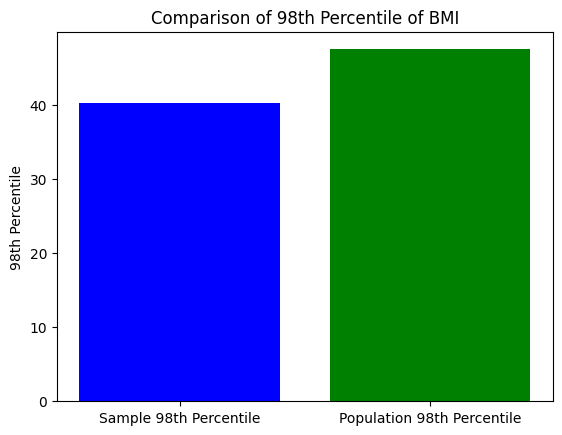

In [12]:
#BMI Calculation
sample_percentile = np.percentile(sample['BMI'], 98)
population_percentile= np.percentile(data['BMI'], 98)

print("98th Percentile of Sample BMI:", sample_percentile)
print("98th Percentile of Population BMI:", population_percentile)

name_label = ['Sample 98th Percentile', 'Population 98th Percentile']
values = [ sample_percentile, population_percentile]
plt.bar(name_label, values, color=['blue', 'green'])
plt.title('Comparison of 98th Percentile of BMI')
plt.ylabel('98th Percentile')
plt.show()


Mean BloodPressure of population: 69.10546875
Standard Deviation BloodPressure of population: 19.355807170644777
98th Percentile BloodPressure of population: 99.31999999999994

Mean BloodPressure of bootstrap: 69.13590666666666
Standard Deviation BloodPressure of bootstrap: 19.257291532331525
98th Percentile BloodPressure of bootstrap: 98.44752000000003


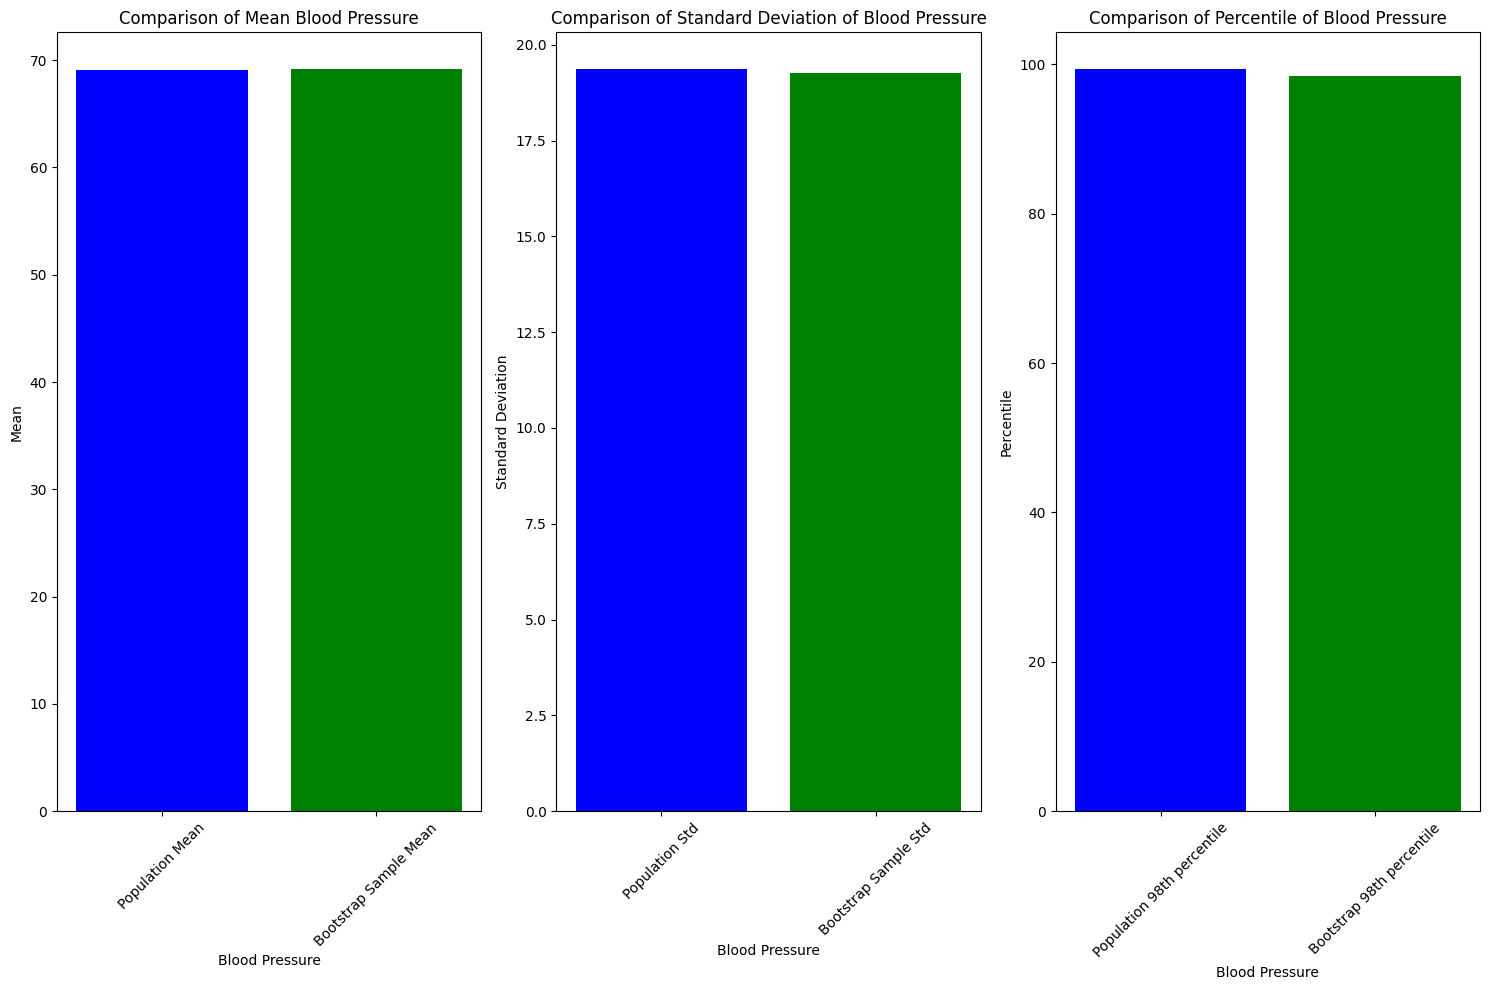

In [36]:
bootstrap_samples = 500
sample_size = 150

bootstrap_means = np.zeros(bootstrap_samples)
bootstrap_standard_devs = np.zeros(bootstrap_samples)
bootstrap_percentiles = np.zeros(bootstrap_samples)

for i in range(bootstrap_samples):
    bootstrap_sample = data['BloodPressure'].sample(sample_size, replace=True)


    bootstrap_means[i] = bootstrap_sample.mean()
    bootstrap_standard_devs[i] = bootstrap_sample.std()
    bootstrap_percentiles[i] = np.percentile(bootstrap_sample, 98)

population_mean = data['BloodPressure'].mean()
population_standard_deviation = data['BloodPressure'].std()
population_percentile = np.percentile(data['BloodPressure'], 98)


print("Mean BloodPressure of population:", population_mean)
print("Standard Deviation BloodPressure of population:", population_standard_deviation)
print("98th Percentile BloodPressure of population:", population_percentile)

# Determine the bootstrap statistics' mean, standard deviation, and 92th percentile.
bootstrap_mean_totalmean = np.mean(bootstrap_means)
bootstrap_mean_totalstandard_deviation = np.mean(bootstrap_standard_devs)
bootstrap_mean_percentile_98 = np.mean(bootstrap_percentiles)


# statistics from the bootstrap.
print("\nMean BloodPressure of bootstrap:", bootstrap_mean_totalmean)
print("Standard Deviation BloodPressure of bootstrap:", bootstrap_mean_totalstandard_deviation)
print("98th Percentile BloodPressure of bootstrap:", bootstrap_mean_percentile_98)

# Plotting the comparison
plt.figure(figsize=(15, 10))

# Mean comparison
name_label = ['Population Mean', 'Bootstrap Sample Mean']
values = [ population_mean, bootstrap_mean_totalmean]
plt.subplot(1, 3, 1)
plt.bar(name_label, values, color=['blue', 'green'])
plt.xlabel('Blood Pressure')
plt.ylabel('Mean')
plt.title('Comparison of Mean Blood Pressure')
plt.xticks(rotation=45)

# Standard deviation comparison
name_label = ['Population Std', 'Bootstrap Sample Std']
values = [ population_standard_deviation, bootstrap_mean_totalstandard_deviation]
plt.subplot(1, 3, 2)
plt.bar(name_label, values, color=['blue', 'green'])
plt.xlabel('Blood Pressure')
plt.ylabel('Standard Deviation')
plt.title('Comparison of Standard Deviation of Blood Pressure')
plt.xticks(rotation=45)

# Percentile comparison
name_label = ['Population 98th percentile', 'Bootstrap 98th percentile']
values = [ population_percentile, bootstrap_mean_percentile_98]
plt.subplot(1, 3, 3)
plt.bar(name_label, values, color=['blue', 'green'])
plt.xlabel('Blood Pressure')
plt.ylabel('Percentile')
plt.title('Comparison of Percentile of Blood Pressure')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
